In [1]:
import pandas as pd

In [2]:
df_transactions = pd.read_csv("Retail_Data_Transactions.csv")
df_responses = pd.read_csv("Retail_Data_Response.csv")

In [3]:
df_transactions.head()
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [4]:
df_responses.head()
df_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


In [5]:
# Remove invalid transactions
df_transactions = df_transactions[df_transactions['tran_amount'] > 0]
df_transactions

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [6]:
df_transactions['trans_date'] = pd.to_datetime(
    df_transactions['trans_date']
)

df_transactions['year'] = df_transactions['trans_date'].dt.year
df_transactions['month'] = df_transactions['trans_date'].dt.month


C:\Users\hasvi\AppData\Local\Temp\ipykernel_11856\4019270838.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_transactions['trans_date'] = pd.to_datetime(


In [7]:
df_transactions

,customer_id,trans_date,tran_amount,year,month
0,CS5295,2013-02-11,35,2013,2
1,CS4768,2015-03-15,39,2015,3
2,CS2122,2013-02-26,52,2013,2
3,CS1217,2011-11-16,99,2011,11
4,CS1850,2013-11-20,78,2013,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,2011,6
124996,CS7232,2014-08-19,38,2014,8
124997,CS8731,2014-11-28,42,2014,11
124998,CS8133,2013-12-14,13,2013,12


In [8]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  125000 non-null  object        
 1   trans_date   125000 non-null  datetime64[ns]
 2   tran_amount  125000 non-null  int64         
 3   year         125000 non-null  int32         
 4   month        125000 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 3.8+ MB


In [9]:
df_transactions = df_transactions.merge(
    df_responses,
    on='customer_id',
    how='left'
)

df_transactions['response'] = df_transactions['response'].fillna(0)
df_transactions


,customer_id,trans_date,tran_amount,year,month,response
0,CS5295,2013-02-11,35,2013,2,1.0
1,CS4768,2015-03-15,39,2015,3,1.0
2,CS2122,2013-02-26,52,2013,2,0.0
3,CS1217,2011-11-16,99,2011,11,0.0
4,CS1850,2013-11-20,78,2013,11,0.0
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,2011,6,0.0
124996,CS7232,2014-08-19,38,2014,8,0.0
124997,CS8731,2014-11-28,42,2014,11,0.0
124998,CS8133,2013-12-14,13,2013,12,0.0


In [10]:
#analysis
df_customer_analysis = df_transactions.groupby('customer_id').agg(
    total_spent=('tran_amount', 'sum'),
    transaction_count=('tran_amount', 'count'),
    avg_transaction=('tran_amount', 'mean'),
    response=('response', 'max')
).reset_index()
df_customer_analysis

,customer_id,total_spent,transaction_count,avg_transaction,response
0,CS1112,1012,15,67.466667,0.0
1,CS1113,1490,20,74.500000,0.0
2,CS1114,1432,19,75.368421,1.0
3,CS1115,1659,22,75.409091,1.0
4,CS1116,857,13,65.923077,1.0
...,...,...,...,...,...
6884,CS8996,582,13,44.769231,0.0
6885,CS8997,543,14,38.785714,0.0
6886,CS8998,624,13,48.000000,0.0
6887,CS8999,383,12,31.916667,0.0


In [11]:
df_customer_analysis['customer_segment'] = pd.cut(
    df_customer_analysis['total_spent'],
    bins=[0, 500, 2000, df_customer_analysis['total_spent'].max()],
    labels=['Low Value', 'Medium Value', 'High Value']
)
df_customer_analysis

,customer_id,total_spent,transaction_count,avg_transaction,response,customer_segment
0,CS1112,1012,15,67.466667,0.0,Medium Value
1,CS1113,1490,20,74.500000,0.0,Medium Value
2,CS1114,1432,19,75.368421,1.0,Medium Value
3,CS1115,1659,22,75.409091,1.0,Medium Value
4,CS1116,857,13,65.923077,1.0,Medium Value
...,...,...,...,...,...,...
6884,CS8996,582,13,44.769231,0.0,Medium Value
6885,CS8997,543,14,38.785714,0.0,Medium Value
6886,CS8998,624,13,48.000000,0.0,Medium Value
6887,CS8999,383,12,31.916667,0.0,Low Value


In [12]:
df_top10 = df_customer_analysis.sort_values(
    by='total_spent',
    ascending=False
).head(10)

df_top10


,customer_id,total_spent,transaction_count,avg_transaction,response,customer_segment
3312,CS4424,2933,39,75.205128,0.0,High Value
3208,CS4320,2647,38,69.657895,1.0,High Value
4640,CS5752,2612,33,79.151515,0.0,High Value
3548,CS4660,2527,33,76.575758,0.0,High Value
2687,CS3799,2513,36,69.805556,0.0,High Value
3997,CS5109,2506,35,71.600000,0.0,High Value
2962,CS4074,2462,34,72.411765,0.0,High Value
2693,CS3805,2453,35,70.085714,0.0,High Value
3496,CS4608,2449,32,76.531250,0.0,High Value
4443,CS5555,2439,31,78.677419,0.0,High Value


In [13]:
df_transactions.to_csv(
    "Retail_Transactions_Enhanced.csv",
    index=False
)


In [14]:
df_customer_analysis.to_csv(
    "Retail_Customer_Analysis.csv",
    index=False
)


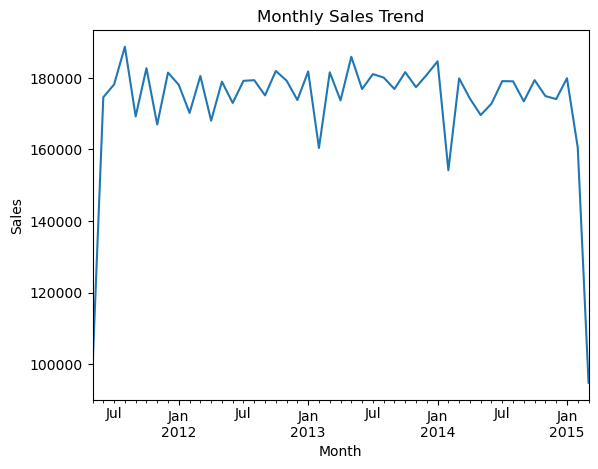

In [19]:
#MONTHLY SALES TREND
import matplotlib.pyplot as plt

monthly_sales =df_transactions.groupby(
    df_transactions['trans_date'].dt.to_period('M')
)['tran_amount'].sum()

monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.savefig("images/monthly_sales_trend.png",bbox_inches="tight")
plt.show()

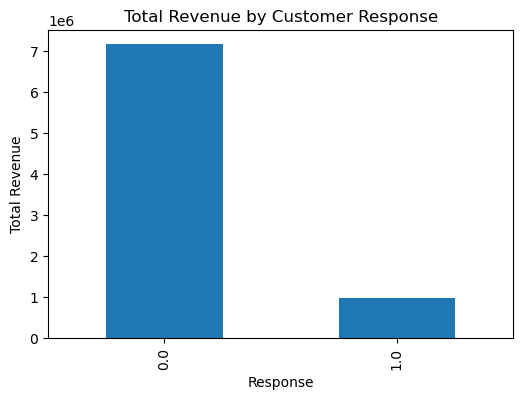

In [20]:
#RESPONSE VS TOTAL REVENUE

response_revenue = (
    df_transactions
    .groupby('response')['tran_amount']
    .sum()
)

plt.figure(figsize=(6,4))
response_revenue.plot(kind='bar')
plt.title("Total Revenue by Customer Response")
plt.xlabel("Response")
plt.ylabel("Total Revenue")
plt.savefig("images/total_revenue_by_response.png")
plt.show()


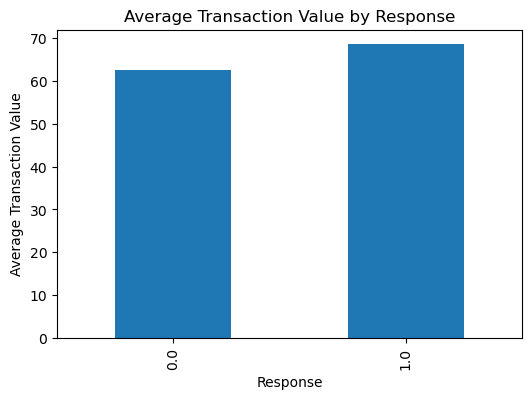

In [21]:
#AVERAGE SPEND BY RESPONSE

avg_spend_response = (
    df_customer_analysis
    .groupby('response')['avg_transaction']
    .mean()
)

plt.figure(figsize=(6,4))
avg_spend_response.plot(kind='bar')
plt.title("Average Transaction Value by Response")
plt.xlabel("Response")
plt.ylabel("Average Transaction Value")
plt.savefig("images/avg_trans_by_response.png")
plt.show()


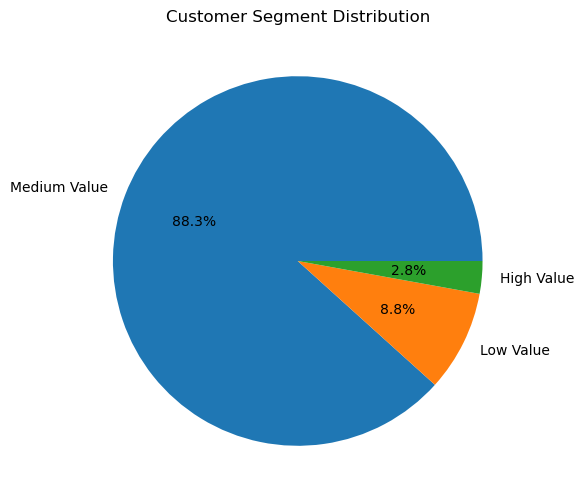

In [22]:
# CUSTOMER SEGMENT DISTRIBUTION

segment_count = df_customer_analysis['customer_segment'].value_counts()

plt.figure(figsize=(6,6))
segment_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Segment Distribution")
plt.ylabel("")
plt.savefig("images/segment_distribution.png")
plt.show()


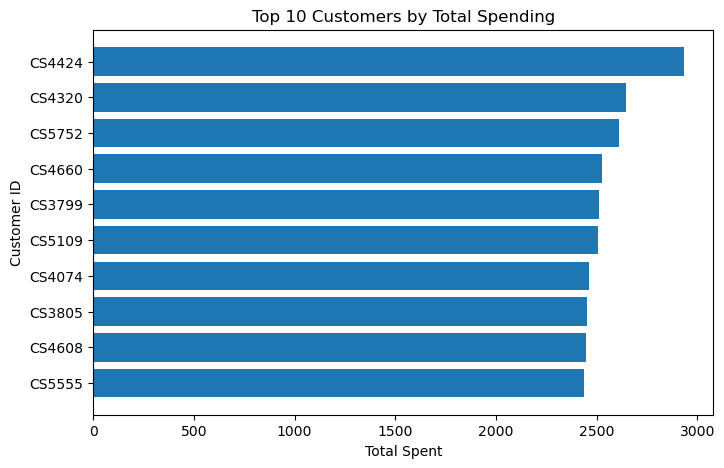

In [23]:
#TOP 10 CUSTOMERS BY TOTAL SPEND

top10 = df_customer_analysis.sort_values(
    by='total_spent',
    ascending=False
).head(10)

plt.figure(figsize=(8,5))
plt.barh(top10['customer_id'], top10['total_spent'])
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spent")
plt.ylabel("Customer ID")
plt.gca().invert_yaxis()
plt.savefig("images/top10_by_total_spend.png")
plt.show()


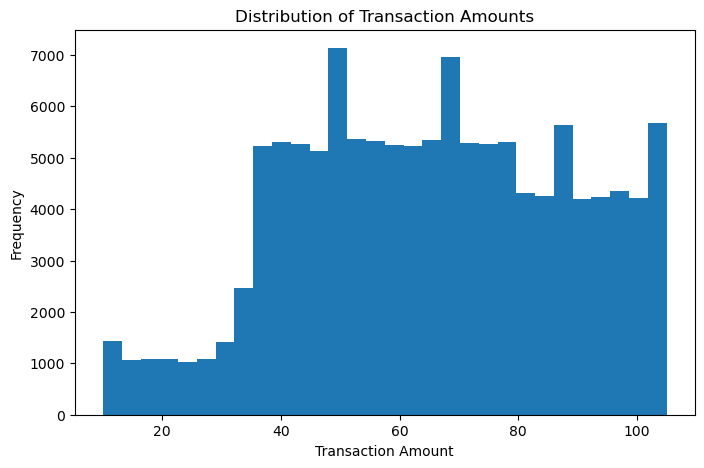

In [24]:
#TRANSACTION AMOUNT DISTRIBUTION

plt.figure(figsize=(8,5))
plt.hist(df_transactions['tran_amount'], bins=30)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.savefig("images/trans_amt_distribution.png")
plt.show()
